# Assignment CIE 5703 - week 6

#### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

## Charlotte rain gauge dataset 15 min data from 1994 - 2015

Show the data source locations. Red dots are available gauges, blue cross denotes the selected station. No specific criteria was chosen to select that specific station.

In [2]:
from mpl_toolkits.basemap import Basemap

In [3]:
def get_basemap(_resolution):
    return Basemap(projection='merc', llcrnrlat=25, urcrnrlat=38, llcrnrlon=275, urcrnrlon=285, lat_ts=35.,
                   resolution=_resolution)

In [4]:
positions = pd.read_csv('./Raw_RG_Data/RG_lat_lon.csv', header=None)
positions.columns=['lat', 'lon']

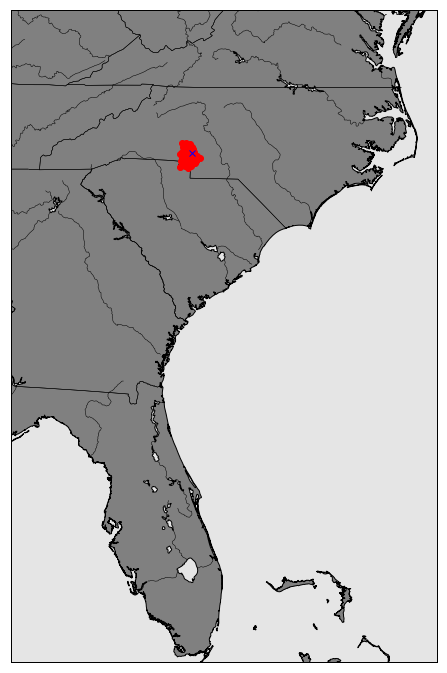

In [5]:
plt.figure(figsize=(24,12))
m = get_basemap('h')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = 'gray')
m.drawmapboundary()
for index, row in positions.iterrows():
    x,y = m(row['lon']+360, row['lat'])
    m.plot(x, y, 'ro', markersize=6)
x,y = m(positions['lon'][0]+360, positions['lat'][0])
m.plot(x, y, 'bx', markersize=6)
m.drawstates()
m.drawrivers()
plt.show()

#### Read in data

In [6]:
charlotte_rainfall = pd.read_csv('./Raw_RG_Data/Charlotte_CRN_gage_1994.csv', header = None)
for i in range(1995,2015):
    cur_rainfall = pd.read_csv('./Raw_RG_Data/Charlotte_CRN_gage_%d.csv' % i, header = None)
    charlotte_rainfall = charlotte_rainfall.append(cur_rainfall, ignore_index=True)

#### Format data to year, month, day, hour, min and rainfall

In [7]:
charlotte_rainfall = charlotte_rainfall.iloc[:,:6]
charlotte_rainfall.columns = ["year","month","day", "hour", "min", "Rainfall"]
charlotte_rainfall.loc[:,'dt'] = pd.to_datetime(dict(year=charlotte_rainfall['year'], month=charlotte_rainfall['month'], day=charlotte_rainfall['day'], hour=charlotte_rainfall['hour'], minute=charlotte_rainfall['min']))
charlotte_rainfall.index=charlotte_rainfall['dt']

#### Plot rain data as read

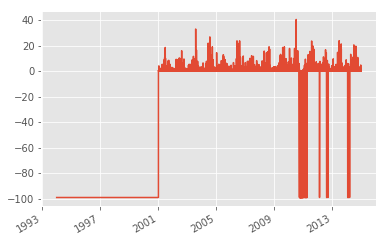

In [8]:
plt.plot(charlotte_rainfall['dt'], charlotte_rainfall["Rainfall"])
plt.gcf().autofmt_xdate()

#### Replace invalid data with NaNs and plot again

In [9]:
charlotte_rainfall["Rainfall"] = charlotte_rainfall["Rainfall"].replace(-99, np.nan)

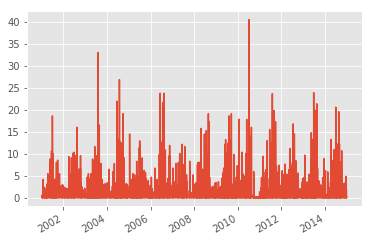

In [10]:
plt.plot(charlotte_rainfall['dt'], charlotte_rainfall["Rainfall"])
plt.gcf().autofmt_xdate()

In [11]:
charlotte_rainfall.head()

,year,month,day,hour,min,Rainfall,dt
dt,,,,,,,
1994-01-01 00:00:00,1994,1,1,0,0,NaN,1994-01-01 00:00:00
1994-01-01 00:15:00,1994,1,1,0,15,NaN,1994-01-01 00:15:00
1994-01-01 00:30:00,1994,1,1,0,30,NaN,1994-01-01 00:30:00
1994-01-01 00:45:00,1994,1,1,0,45,NaN,1994-01-01 00:45:00
1994-01-01 01:00:00,1994,1,1,1,0,NaN,1994-01-01 01:00:00


#### Resample the 10-min dataset to 24h accumulated rainfall data

In [12]:
charlotte_24h_rainfall = pd.DataFrame()
charlotte_24h_rainfall['mean_rain'] = charlotte_rainfall.Rainfall.resample('D').mean()
charlotte_24h_rainfall['accum_rain'] = charlotte_rainfall.Rainfall.resample('D').sum()

In [13]:
charlotte_24h_rainfall.tail()

,mean_rain,accum_rain
dt,,
2014-12-27,0.000000,0.000
2014-12-28,0.007938,0.762
2014-12-29,0.187854,18.034
2014-12-30,0.015875,1.524
2014-12-31,0.000000,0.000


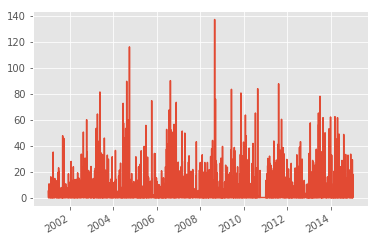

In [14]:
plt.plot(charlotte_24h_rainfall["accum_rain"])
plt.gcf().autofmt_xdate()

#### Resample 15 min data to 1h accumulated dataset

In [15]:
charlotte_1h_rainfall = pd.DataFrame()
charlotte_1h_rainfall['mean_rain'] = charlotte_rainfall.Rainfall.resample('H').mean()
charlotte_1h_rainfall['accum_rain'] = charlotte_rainfall.Rainfall.resample('H').sum()

In [16]:
charlotte_1h_rainfall.head()

,mean_rain,accum_rain
dt,,
1994-01-01 00:00:00,NaN,NaN
1994-01-01 01:00:00,NaN,NaN
1994-01-01 02:00:00,NaN,NaN
1994-01-01 03:00:00,NaN,NaN
1994-01-01 04:00:00,NaN,NaN


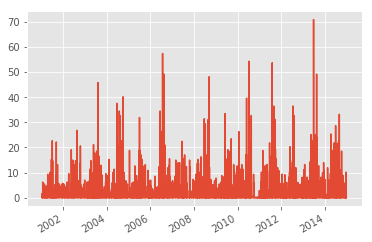

In [17]:
plt.plot(charlotte_1h_rainfall["accum_rain"])
plt.gcf().autofmt_xdate()

#### Select only summer months (April - Sept)

In [18]:
charlotte_summer_1h_rainfall = charlotte_1h_rainfall.loc[(charlotte_1h_rainfall.index.month>=4) & (charlotte_1h_rainfall.index.month<=9)]

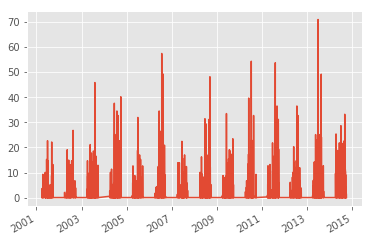

In [19]:
plt.plot(charlotte_summer_1h_rainfall["accum_rain"])
plt.gcf().autofmt_xdate()

#### Select only winter months (Oct - Mar)

In [20]:
mask_start = (charlotte_1h_rainfall.index.month >= 1) & (charlotte_1h_rainfall.index.month <= 3)
mask_end = (charlotte_1h_rainfall.index.month >= 10) & (charlotte_1h_rainfall.index.month <= 12)
mask = mask_start | mask_end

In [21]:
charlotte_winter_1h_rainfall = charlotte_1h_rainfall.loc[mask]

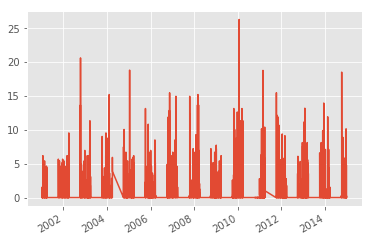

In [22]:
plt.plot(charlotte_winter_1h_rainfall["accum_rain"])
plt.gcf().autofmt_xdate()

In [23]:
charlotte_winter_1h_rainfall.head()

,mean_rain,accum_rain
dt,,
1994-01-01 00:00:00,NaN,NaN
1994-01-01 01:00:00,NaN,NaN
1994-01-01 02:00:00,NaN,NaN
1994-01-01 03:00:00,NaN,NaN
1994-01-01 04:00:00,NaN,NaN


#### Resample 15 min dataset to monthly accumulated dataset

In [24]:
charlotte_monthly_rainfall = pd.DataFrame()
charlotte_monthly_rainfall['mean_rain'] = charlotte_rainfall.Rainfall.resample('M').mean()
charlotte_monthly_rainfall['accum_rain'] = charlotte_rainfall.Rainfall.resample('M').sum()

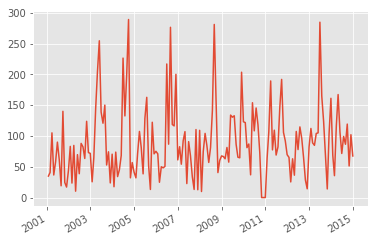

In [25]:
plt.plot(charlotte_monthly_rainfall["accum_rain"])
plt.gcf().autofmt_xdate()

## Answering the assignments

### 1. General statistics for 24-hour and 15-min datasets: compute mean, standard deviation, skewness; plot histograms

#### 15 min dataset

Mean, standard deviation and skewness of the 15 min dataset

In [26]:
print('Mean: %s' % str(charlotte_rainfall.Rainfall.mean()))
print('Std: %s' % str(charlotte_rainfall.Rainfall.std()))
print('Skew: %s' % str(charlotte_rainfall.Rainfall.skew()))

Mean: 0.0308591125909
Std: 0.354761056652
Skew: 31.8036079401


Histogram of the data

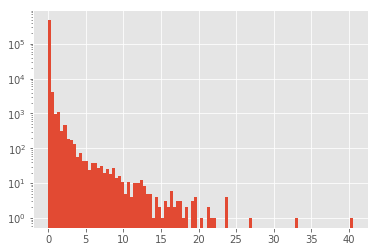

In [27]:
charlotte_rainfall.Rainfall.hist(bins = 100)
plt.gca().set_yscale("log")

Histogram of the data without zeros

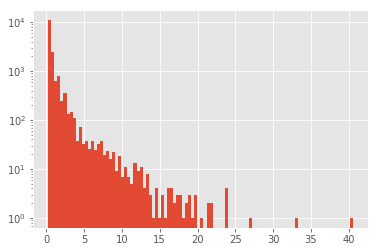

In [28]:
cur_data = charlotte_rainfall.Rainfall.loc[charlotte_rainfall.Rainfall>0]
hist_d = plt.hist(cur_data, bins=100)
plt.gca().set_yscale("log")

#### 24h accumulated dataset

Mean, standard deviation and skewness of 24h accumulated dataset

In [29]:
print('Mean: %s' % str(charlotte_24h_rainfall.accum_rain.mean()))
print('Std: %s' % str(charlotte_24h_rainfall.accum_rain.std()))
print('Skew: %s' % str(charlotte_24h_rainfall.accum_rain.skew()))

Mean: 2.95431623325
Std: 9.00781350848
Skew: 5.36032791051


Histogram of the dataset

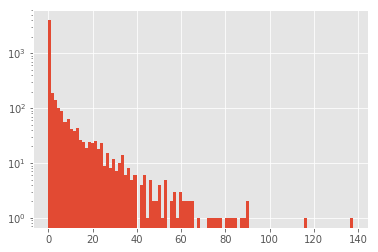

In [30]:
charlotte_24h_rainfall.accum_rain.hist(bins = 100)
plt.gca().set_yscale("log")

Histogram without zeros

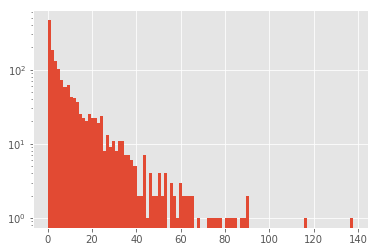

In [31]:
cur_data = charlotte_24h_rainfall.accum_rain.loc[charlotte_24h_rainfall.accum_rain>0]
hist_d = plt.hist(cur_data, bins=100)
plt.gca().set_yscale("log")

### 2. a. Analysis of seasonal cycles: create boxplots for monthly totals across all years

Boxplot of monthly totals

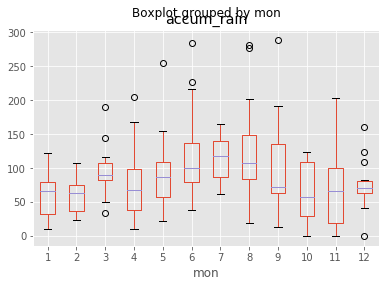

In [32]:
charlotte_monthly_rainfall['mon'] = charlotte_monthly_rainfall.index.month
charlotte_monthly_rainfall['year'] = charlotte_monthly_rainfall.index.year
charlotte_monthly_rainfall.boxplot(column=['accum_rain'], by='mon')

Or on a yearly scale:

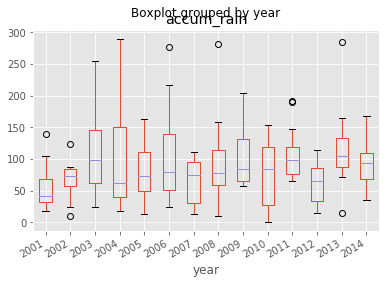

In [33]:
charlotte_monthly_rainfall.dropna().boxplot(column=['accum_rain'], by='year')
plt.gcf().autofmt_xdate()

### 2. b. Analysis of diurnal cycles: create boxplots for hourly totals for entire dataseries

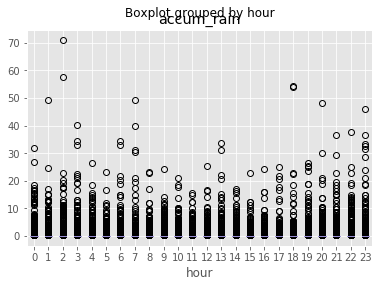

In [34]:
charlotte_1h_rainfall['hour'] = charlotte_1h_rainfall.index.hour
charlotte_1h_rainfall.boxplot(column=['accum_rain'], by='hour')

### 2. c. Variation of diurnal cycles with seasons: create boxplots for hourly totals for summer season (April – September) and for winter season (October-March)

Merge summer hourly data

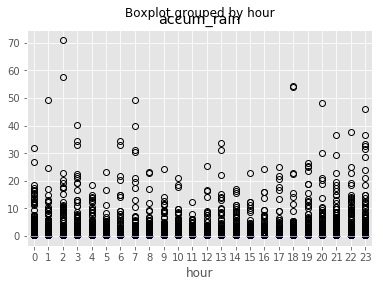

In [35]:
pd.options.mode.chained_assignment = None  # default='warn'
charlotte_summer_1h_rainfall['hour'] = charlotte_summer_1h_rainfall.index.hour
charlotte_summer_1h_rainfall.boxplot(column=['accum_rain'], by='hour')

Merge hourly winter data

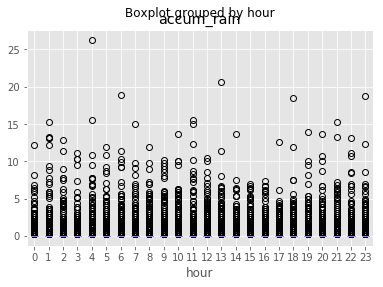

In [36]:
charlotte_winter_1h_rainfall['hour'] = charlotte_winter_1h_rainfall.index.hour
charlotte_winter_1h_rainfall.boxplot(column=['accum_rain'], by='hour')

### 2. d. Diurnal cycles of intense storm events: Count nr of exceedances above 10 mm/h threshold for each hour of the day, for entire data series and for summer months only

Show rainfall events > 10mm /h over entire 1h accumulated dataset

In [37]:
print(charlotte_1h_rainfall.accum_rain[charlotte_1h_rainfall.accum_rain>10])

dt
2001-05-22 20:00:00    10.06348
2001-06-13 23:00:00    12.12850
2001-06-14 00:00:00    15.22476
2001-06-28 22:00:00    22.71014
2001-07-04 23:00:00    10.32256
2001-07-05 00:00:00    14.70914
2001-09-04 13:00:00    22.19198
2001-09-24 13:00:00    13.16228
2001-09-24 15:00:00    12.13104
2002-05-13 22:00:00    19.09572
2002-06-06 23:00:00    14.96822
2002-06-25 22:00:00    10.58164
2002-07-03 22:00:00    13.15974
2002-07-14 14:00:00    11.09726
2002-07-24 23:00:00    14.71168
2002-08-16 02:00:00    10.84072
2002-08-17 00:00:00    26.83764
2002-08-17 03:00:00    12.12850
2002-10-11 10:00:00    13.67536
2002-10-11 11:00:00    12.38758
2002-10-13 12:00:00    10.06602
2002-10-13 13:00:00    20.64258
2003-03-20 06:00:00    11.35380
2003-04-07 06:00:00    14.71168
2003-05-21 20:00:00    21.16074
2003-05-27 04:00:00    14.70914
2003-06-09 02:00:00    17.80794
2003-06-16 22:00:00    14.19352
2003-07-11 21:00:00    16.25854
2003-07-13 04:00:00    18.58010
                         ...   
2013-

Amount of hourly events

In [38]:
print(len(charlotte_1h_rainfall.accum_rain[charlotte_1h_rainfall.accum_rain>10]))

254


10 mm/h events in summer periods

In [39]:
print(charlotte_summer_1h_rainfall.accum_rain[charlotte_summer_1h_rainfall.accum_rain>10])

dt
2001-05-22 20:00:00    10.06348
2001-06-13 23:00:00    12.12850
2001-06-14 00:00:00    15.22476
2001-06-28 22:00:00    22.71014
2001-07-04 23:00:00    10.32256
2001-07-05 00:00:00    14.70914
2001-09-04 13:00:00    22.19198
2001-09-24 13:00:00    13.16228
2001-09-24 15:00:00    12.13104
2002-05-13 22:00:00    19.09572
2002-06-06 23:00:00    14.96822
2002-06-25 22:00:00    10.58164
2002-07-03 22:00:00    13.15974
2002-07-14 14:00:00    11.09726
2002-07-24 23:00:00    14.71168
2002-08-16 02:00:00    10.84072
2002-08-17 00:00:00    26.83764
2002-08-17 03:00:00    12.12850
2003-04-07 06:00:00    14.71168
2003-05-21 20:00:00    21.16074
2003-05-27 04:00:00    14.70914
2003-06-09 02:00:00    17.80794
2003-06-16 22:00:00    14.19352
2003-07-11 21:00:00    16.25854
2003-07-13 04:00:00    18.58010
2003-07-29 19:00:00    11.35634
2003-08-04 23:00:00    45.93590
2003-08-05 03:00:00    19.09572
2003-08-24 05:00:00    16.51508
2003-09-23 03:00:00    12.90320
                         ...   
2013-

Amount of hourly events

In [40]:
print(len(charlotte_summer_1h_rainfall.accum_rain[charlotte_summer_1h_rainfall.accum_rain>10]))

205


#### 3. Fit GEV-distribution for POT values in the time series

#### 3. a. Create plots: histogram and GEV fit and interpret

In [41]:
charlotte_1h_exceeds = charlotte_1h_rainfall.accum_rain[charlotte_1h_rainfall.accum_rain>10]

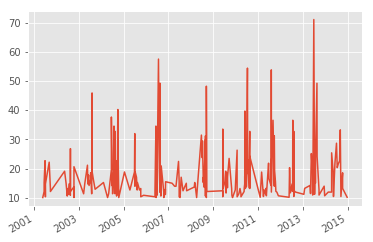

In [42]:
plt.plot(charlotte_1h_exceeds)
plt.gcf().autofmt_xdate()

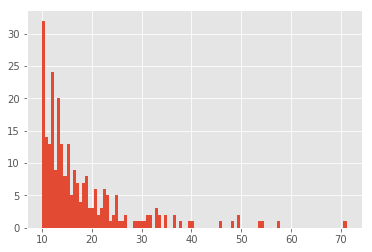

In [43]:
charlotte_1h_exceeds.hist(bins=100)

In [44]:
from scipy.stats import genextreme

In [45]:
x = np.linspace(0, 80, 1000)
y = np.array(charlotte_1h_exceeds[:])

In [46]:
np.seterr(divide='ignore', invalid='ignore')
genextreme.fit(y)

(-0.63196524647445651, 12.905350711560139, 3.2547579938261819)

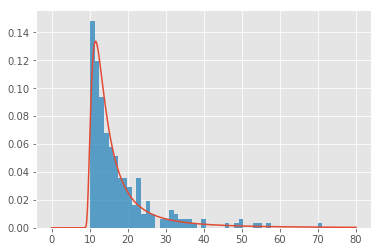

In [47]:
pdf = plt.plot(x, genextreme.pdf(x, *genextreme.fit(y)))
pdf_hist = plt.hist(y, bins=50, normed=True, histtype='stepfilled', alpha=0.8)

#### 3. c. Compute rainfall amounts associated with return periods of 1 year, 10 years and 100 years

In [48]:
genextreme.ppf((1-1/1), *genextreme.fit(y))

7.7551339678649835

In [49]:
genextreme.ppf((1-1/10), *genextreme.fit(y))

29.108144592730593

In [50]:
genextreme.ppf((1-1/100), *genextreme.fit(y))

102.0260987749248